## Pip Install

In [1]:
!pip install pyspark
!pip install matplotlib seaborn

## Importing Libraries

In [2]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
import seaborn as sns
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StandardScaler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier

## Building Spark Session 

In [3]:
spark = SparkSession.builder.appName('Student Dropout Prediction').getOrCreate()

## Importing dataset

In [4]:
data_path = "D:/Assignment/dataset.csv"
student_df= spark.read.csv(data_path, header = True, inferSchema= True)

In [5]:
# check all the datatypes of the column
student_df.dtypes

[('Marital status', 'int'),
 ('Application mode', 'int'),
 ('Application order', 'int'),
 ('Course', 'int'),
 ('Daytime/evening attendance', 'int'),
 ('Previous qualification', 'int'),
 ('Nacionality', 'int'),
 ("Mother's qualification", 'int'),
 ("Father's qualification", 'int'),
 ("Mother's occupation", 'int'),
 ("Father's occupation", 'int'),
 ('Displaced', 'int'),
 ('Educational special needs', 'int'),
 ('Debtor', 'int'),
 ('Tuition fees up to date', 'int'),
 ('Gender', 'int'),
 ('Scholarship holder', 'int'),
 ('Age at enrollment', 'int'),
 ('International', 'int'),
 ('Curricular units 1st sem (credited)', 'int'),
 ('Curricular units 1st sem (enrolled)', 'int'),
 ('Curricular units 1st sem (evaluations)', 'int'),
 ('Curricular units 1st sem (approved)', 'int'),
 ('Curricular units 1st sem (grade)', 'double'),
 ('Curricular units 1st sem (without evaluations)', 'int'),
 ('Curricular units 2nd sem (credited)', 'int'),
 ('Curricular units 2nd sem (enrolled)', 'int'),
 ('Curricular uni

## Data Description

In [6]:
# Get the number of rows and columns
num_rows = student_df.count()
num_columns = len(student_df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 4424
Number of columns: 35


In [7]:
#Check the schema
student_df.printSchema()

root
 |-- Marital status: integer (nullable = true)
 |-- Application mode: integer (nullable = true)
 |-- Application order: integer (nullable = true)
 |-- Course: integer (nullable = true)
 |-- Daytime/evening attendance: integer (nullable = true)
 |-- Previous qualification: integer (nullable = true)
 |-- Nacionality: integer (nullable = true)
 |-- Mother's qualification: integer (nullable = true)
 |-- Father's qualification: integer (nullable = true)
 |-- Mother's occupation: integer (nullable = true)
 |-- Father's occupation: integer (nullable = true)
 |-- Displaced: integer (nullable = true)
 |-- Educational special needs: integer (nullable = true)
 |-- Debtor: integer (nullable = true)
 |-- Tuition fees up to date: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Scholarship holder: integer (nullable = true)
 |-- Age at enrollment: integer (nullable = true)
 |-- International: integer (nullable = true)
 |-- Curricular units 1st sem (credited): integer (nullab

## Exploratory Data Analysis (EDA)

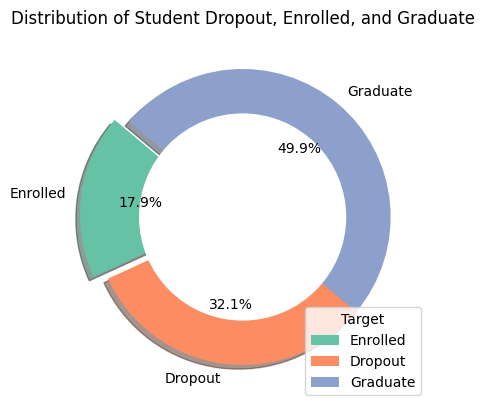

In [8]:
# Distribution of Student Dropout, Enrolled, and Graduate
# Group the data by 'Target' and count occurrences
students_target = student_df.groupBy('Target').count()

# Convert the result to a Pandas DataFrame (for visualization)
students_target_pandas = students_target.toPandas()

# Define custom colors for the pie chart segments
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  

# Create the pie chart
plt.figure(figsize=(8, 4))
plt.pie(students_target_pandas['count'], labels=students_target_pandas['Target'], autopct='%2.1f%%', colors=colors, startangle=140, shadow=True, explode=(0.1, 0, 0))

# Draw circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Set title and legend
plt.title('Distribution of Student Dropout, Enrolled, and Graduate')
plt.legend(students_target_pandas['Target'], title="Target", loc="lower right")

plt.show()


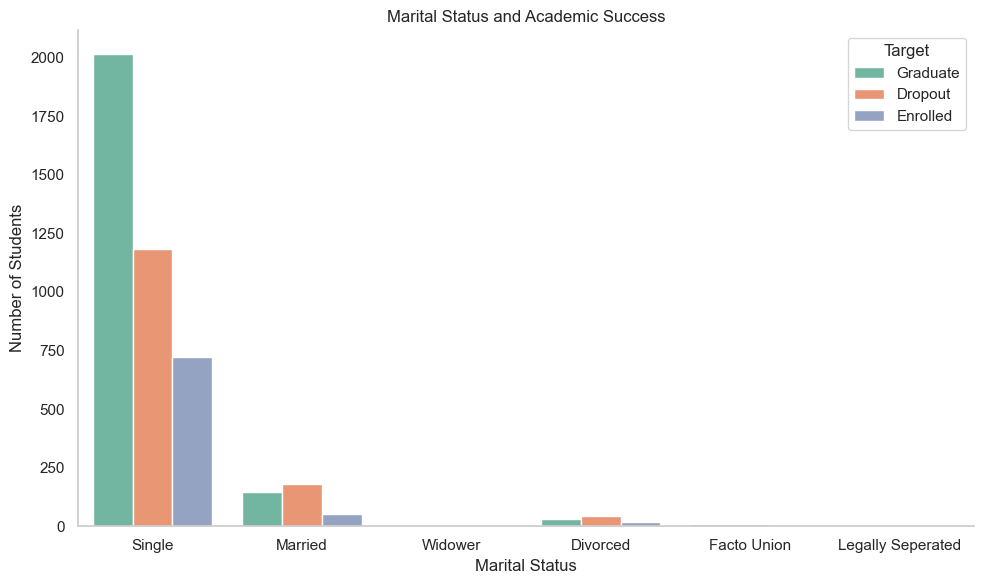

In [9]:
# Distribution of Student Dropout, Enrolled, and Graduate
# Group by 'Marital status' and 'Target' columns and count the occurrences
marital_status_target_counts = student_df.groupBy('Marital status', 'Target').count().orderBy('Marital status', 'Target')

# Convert the result to a Pandas DataFrame (for visualization)
marital_status_target_counts_pandas = marital_status_target_counts.toPandas()

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=marital_status_target_counts_pandas, x='Marital status', y='count', hue='Target', hue_order=['Graduate', 'Dropout', 'Enrolled'], palette='Set2')

# Customizing the plot
# plt.xticks(rotation=180)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.title('Marital Status and Academic Success')
plt.legend(title='Target', loc='upper right')
plt.grid(False)
sns.despine()

plt.tight_layout()
plt.show()


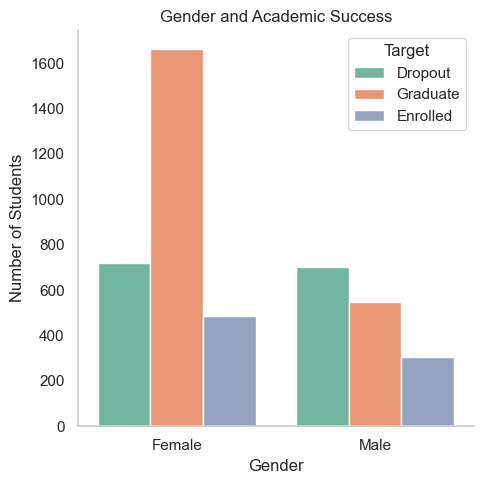

In [11]:
# Distribution of Student Dropout and Gender
# Group by 'Gender' and 'Target' columns and count the occurrences
gender_target_counts = student_df.groupBy('Gender', 'Target').count().orderBy('Gender', 'Target')

# Convert the result to a Pandas DataFrame (for visualization)
gender_target_counts_pandas = gender_target_counts.toPandas()

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the bar plot using seaborn
plt.figure(figsize=(5, 5))
sns.barplot(data=gender_target_counts_pandas, x='Gender', y='count', hue='Target', hue_order=['Dropout', 'Graduate', 'Enrolled'], palette='Set2')

# Customizing the plot
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Gender and Academic Success')
plt.legend(title='Target', loc='upper right')
plt.grid(False)
sns.despine()

plt.tight_layout()
plt.show()


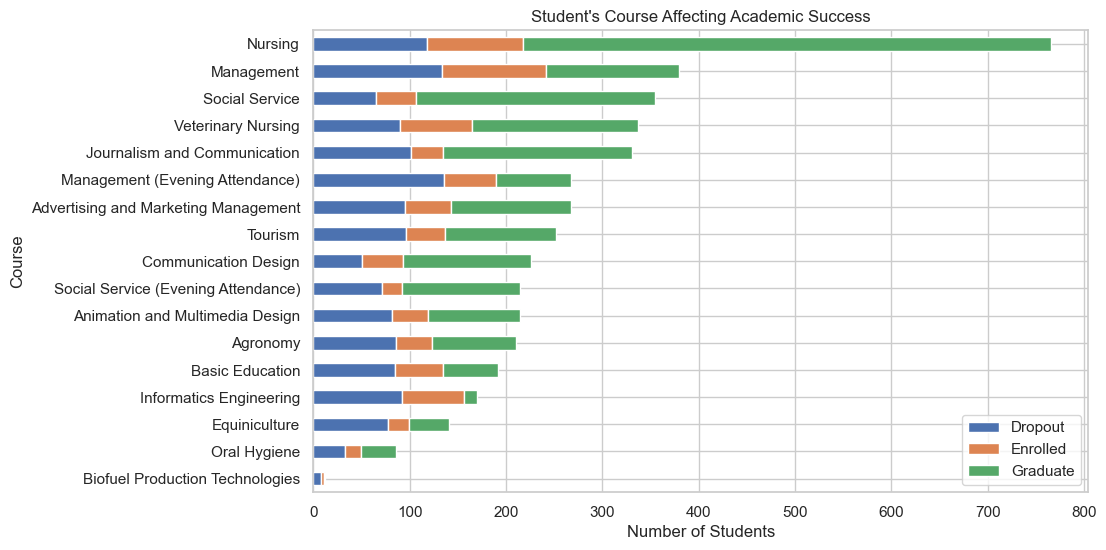

In [12]:
# Student's course affecting the academic success of students
student_course = student_df.groupBy('Course', 'Target').count().orderBy('Course', 'Target')

# Convert to Pandas DataFrame
student_course_pandas = student_course.toPandas()

# Pivot the data
student_course_pivot = student_course_pandas.pivot(index='Course', columns='Target', values='count')

course_names={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',
    5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'
}


student_course_pivot.rename(index=course_names, inplace=True)

# Sort courses by total number of students
student_course_total = student_course_pivot.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course_sorted_df = student_course_pivot.loc[student_course_sorted.index]

# Create a stacked horizontal bar plot
ax = student_course_sorted_df.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.xlabel('Number of Students')
plt.ylabel('Course')
plt.title("Student's Course Affecting Academic Success")

# Remove legend title
ax.legend(title='')

# Show the plot
plt.show()


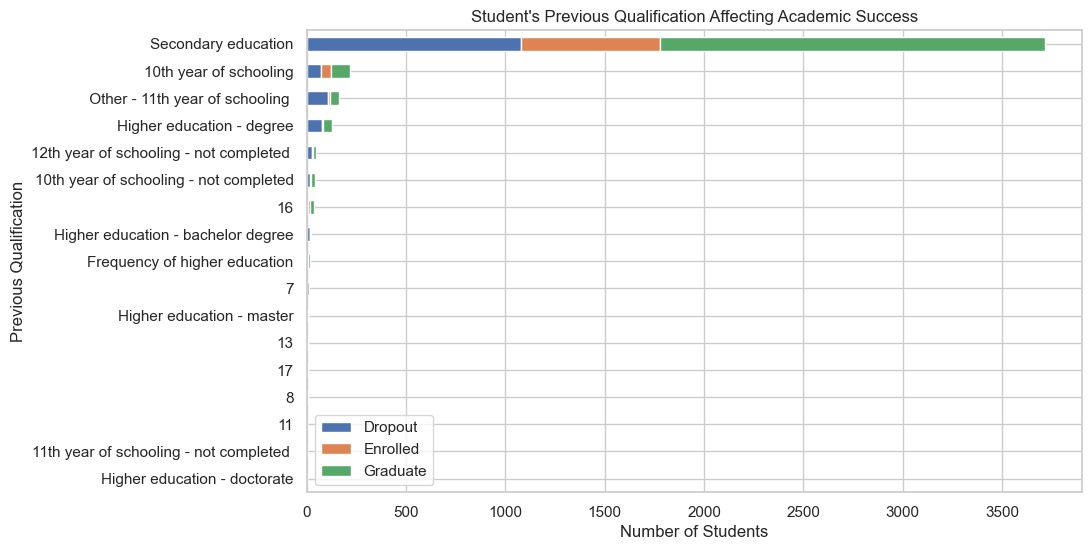

In [13]:
# Previous qualification course affecting the academic success of students
student_qualification = student_df.groupBy('Previous qualification', 'Target').count().orderBy('Previous qualification', 'Target')

# Convert to Pandas DataFrame
student_qualification_pandas = student_qualification.toPandas()

# Pivot the data
student_qualification_pivot = student_qualification_pandas.pivot(index='Previous qualification', columns='Target', values='count')


qualifications={
    1  : 'Secondary education',
    2 : 'Higher education - bachelor degree',
    3 : 'Higher education - degree',
    4 : 'Higher education - master',
    5 : 'Higher education - doctorate',
    6 : 'Frequency of higher education',
    9 : '12th year of schooling - not completed ',
    10 : '11th year of schooling - not completed ',
    12 :' Other - 11th year of schooling ',
    14 : '10th year of schooling',
    15 : '10th year of schooling - not completed',
    19 : 'Basic education 3rd cycle (9th/10th/11th year) or equiv. ',
    38 : 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39 : 'Technological specialization course ',
    40 : 'Higher education - degree (1st cycle) ',
    42 : 'Professional higher technical course ',
    43 : 'Higher education - master (2nd cycle)'
}


student_qualification_pivot.rename(index=qualifications, inplace=True)

# Sort courses by total number of students
student_qualification_total = student_qualification_pivot.sum(axis=1)
student_qualification_sorted = student_qualification_total.sort_values(ascending=True)
student_qualification_sorted_df = student_qualification_pivot.loc[student_qualification_sorted.index]

# Create a stacked horizontal bar plot
ax = student_qualification_sorted_df.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.xlabel('Number of Students')
plt.ylabel('Previous Qualification')
plt.title("Student's Previous Qualification Affecting Academic Success")

# Remove legend title
ax.legend(title='')

# Show the plot
plt.show()


## Data Preprocessing

In [14]:
#check missing data
for col in student_df.columns:
    print(col.ljust(20), student_df.filter(student_df[col].isNull()).count())

Marital status       0
Application mode     0
Application order    0
Course               0
Daytime/evening attendance 0
Previous qualification 0
Nacionality          0
Mother's qualification 0
Father's qualification 0
Mother's occupation  0
Father's occupation  0
Displaced            0
Educational special needs 0
Debtor               0
Tuition fees up to date 0
Gender               0
Scholarship holder   0
Age at enrollment    0
International        0
Curricular units 1st sem (credited) 0
Curricular units 1st sem (enrolled) 0
Curricular units 1st sem (evaluations) 0
Curricular units 1st sem (approved) 0
Curricular units 1st sem (grade) 0
Curricular units 1st sem (without evaluations) 0
Curricular units 2nd sem (credited) 0
Curricular units 2nd sem (enrolled) 0
Curricular units 2nd sem (evaluations) 0
Curricular units 2nd sem (approved) 0
Curricular units 2nd sem (grade) 0
Curricular units 2nd sem (without evaluations) 0
Unemployment rate    0
Inflation rate       0
GDP                

In [15]:
# Drop rows with missing values if any
student_df = student_df.na.drop()

In [16]:
# Group by 'Target' column and count the occurrences of Graduate and Dropout
target_counts = student_df.groupBy('Target').count()

# Show the result
target_counts.show()

+--------+-----+
|  Target|count|
+--------+-----+
|Enrolled|  794|
| Dropout| 1421|
|Graduate| 2209|
+--------+-----+



In [6]:
# rename column nacionality into nationality
student_df = student_df.withColumnRenamed("Nacionality", "Nationality")
student_df.limit(5).toPandas()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
from pyspark.sql.functions import col, when
# Remove rows where 'Target' is 'Enrolled' to work with students who have graduated and dropped out
student_df = student_df.filter(col('Target') != 'Enrolled')

In [8]:
# Convert 'Target' values to 1 for 'Dropout' and 0 for 'Graduate'
student_df = student_df.withColumn('Target', when(col('Target') == 'Dropout', 0).otherwise(1))

# Show the modified dataframe
student_df.limit(5).toPandas()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# Feature Selection

In [20]:
# demographic data
demographic_data = student_df[["Marital status", "Nationality", 
                               "Displaced", "Gender", "Age at enrollment", 
                               "International", "Target"]]

# socio-economic data
socio_economic_data = student_df[["Mother's qualification",
                                  "Father's qualification", "Mother's occupation", 
                                  "Father's occupation", "Educational special needs", "Debtor",
                                  "Tuition fees up to date", "Scholarship holder", "Target"]]

# enrollment Data
enrollment_data = student_df[['Unemployment rate', 'Inflation rate', 'GDP',
                              'Application mode', 'Application order', 'Course',
                              'Daytime/evening attendance', 'Previous qualification', 'Target']]

# academic data
academic_data = student_df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

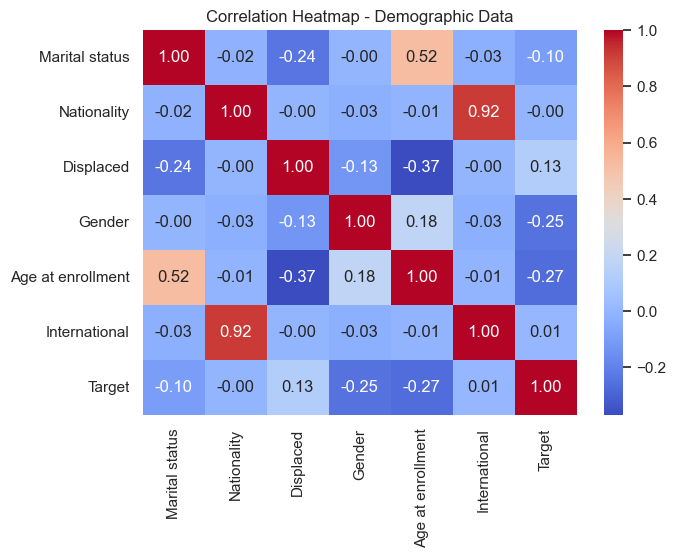

In [21]:
# Correlation Heatmap for Demographic data
# Convert the PySpark DataFrame to a Pandas DataFrame
demo_data_pandas = demographic_data.toPandas()

# Calculate the correlation matrix
correlation_matrix = demo_data_pandas.corr()

# Set up the seaborn style
sns.set()

# Create the correlation matrix heatmap using seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Demographic Data')
plt.show()

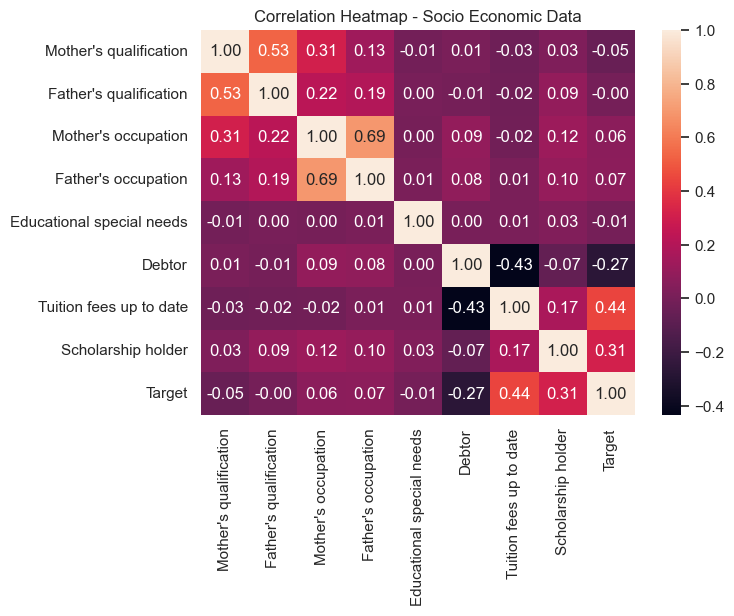

In [22]:
# Coorelation heatmap for Socio economic data
# Convert the PySpark DataFrame to a Pandas DataFrame
se_data_pandas = socio_economic_data.toPandas()

# Calculate the correlation matrix
correlation_matrix = se_data_pandas.corr()

# Set up the seaborn style
sns.set()

# Create the correlation matrix heatmap using seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap - Socio Economic Data')
plt.show()

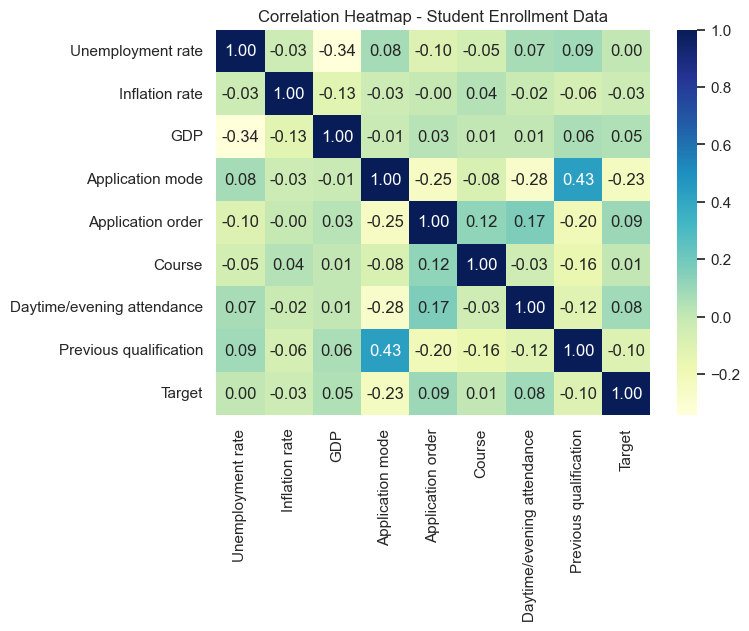

In [23]:
# Coorelation heatmap for Enrollment data
# Convert the PySpark DataFrame to a Pandas DataFrame
enrollment_data_pandas = enrollment_data.toPandas()

# Calculate the correlation matrix
correlation_matrix = enrollment_data_pandas.corr()

# Set up the seaborn style
sns.set()

# Create the correlation matrix heatmap using seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap - Student Enrollment Data')
plt.show()

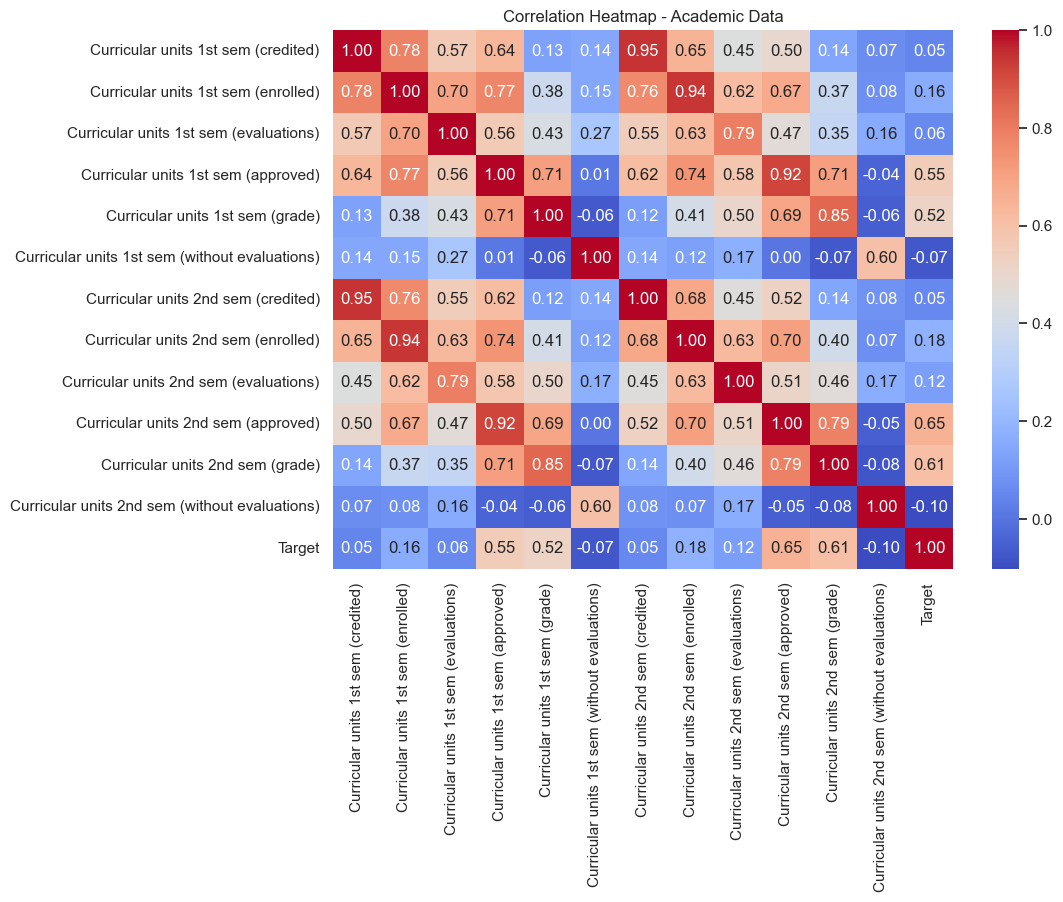

In [26]:
# Coorelation heatmap for Academic data
# Convert the PySpark DataFrame to a Pandas DataFrame
academic_data_pandas = academic_data.toPandas()

# Calculate the correlation matrix
correlation_matrix = academic_data_pandas.corr()

# Set up the seaborn style
sns.set()

# Create the correlation matrix heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Academic Data')
plt.show()

## Remove Unwanted columns

In [9]:
# List and drop unwanted columns
unwanted_columns = ["Nationality", "International", "Curricular units 1st sem (credited)",
                    "Curricular units 1st sem (enrolled)",
                   "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
                    "Curricular units 1st sem (grade)"]

student_df = student_df.drop(*unwanted_columns)

In [10]:
selected_columns = [
    "Marital status",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "Age at enrollment",
    "Target"
]

selected_df = student_df.select(*selected_columns)
selected_df.limit(5).toPandas()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,1,2,1,1,13,10,6,10,0,1,1,0,20,0
1,1,11,1,1,1,3,4,4,0,0,1,0,19,1
2,1,5,1,1,22,27,10,10,0,0,1,0,19,0
3,1,15,1,1,23,27,6,4,0,1,0,0,20,1
4,2,3,0,1,22,28,10,10,0,1,0,0,45,1


## Train-Test Split

In [11]:
# Split data into training and testing sets
train_data, test_data = student_df.randomSplit([0.8, 0.2], seed=42)

In [12]:
# List of columns excluding the 'Target' column
feature_columns = [
    "Marital status",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "Age at enrollment",
]

# Create a StringIndexer for categorical columns
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_index",handleInvalid="keep")for column in feature_columns]

# Create a VectorAssembler
assembler = VectorAssembler(inputCols=[f"{column}_index" for column in feature_columns], outputCol="features")

## Building Models

## Logistic Regression

In [31]:
# Create a LogisticRegression model
lr_classifier = LogisticRegression(featuresCol="features", labelCol="Target", maxIter=100, regParam=0.01)

# Create a pipeline
lr_pipeline = Pipeline(stages=indexers + [assembler, lr_classifier])

# Train the model
lr_model = lr_pipeline.fit(train_data)

# Make predictions
lr_predictions = lr_model.transform(test_data)
lr_predictions.limit(2).toPandas()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Father's occupation_index,Educational special needs_index,Tuition fees up to date_index,Gender_index,Scholarship holder_index,Age at enrollment_index,features,rawPrediction,probability,prediction
0,1,1,1,2,1,1,1,1,5,4,...,3.0,0.0,0.0,1.0,0.0,1.0,"(0.0, 10.0, 0.0, 0.0, 0.0, 2.0, 1.0, 3.0, 0.0,...","[0.07829351492182246, -0.07829351492182246]","[0.5195633863260674, 0.48043661367393264]",0.0
1,1,1,1,2,1,1,1,1,10,4,...,3.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 10.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 0.0,...","[-0.6690678167856616, 0.6690678167856616]","[0.3387056036279983, 0.6612943963720017]",1.0


ROC-AUC Curve: 0.83


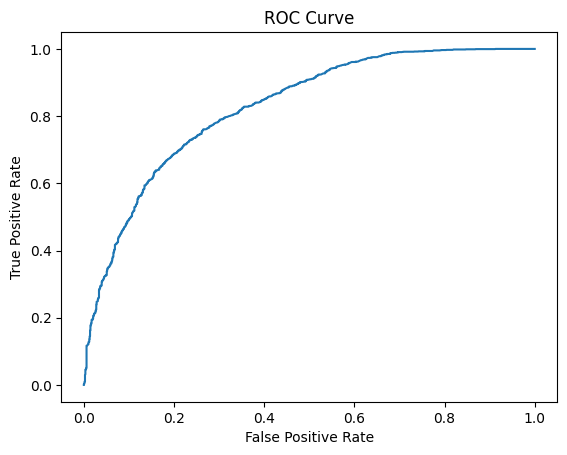

In [32]:
# ROC-AUC
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Target", metricName="areaUnderROC")
roc_auc = binary_evaluator.evaluate(lr_predictions)
print(f"ROC-AUC Curve: {roc_auc:.2f}")

# ROC Curve
lr_classifier_model = lr_model.stages[-1]
roc = lr_classifier_model.summary.roc.toPandas()
plt.plot(roc['FPR'], roc['TPR'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
# Evaluate the model
# Accuracy
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
print(f"Accuracy: {lr_accuracy:.2f}")

# Precision
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="precisionByLabel")
lr_precision = evaluator.evaluate(lr_predictions)
print(f"Precision: {lr_precision:.2f}")

# Recall
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="recallByLabel")
lr_recall = evaluator.evaluate(lr_predictions)
print(f"Recall: {lr_recall:.2f}")

# F1-Score
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="f1")
lr_f1_score = evaluator.evaluate(lr_predictions)
print(f"F1-Score: {lr_f1_score:.2f}")

Accuracy: 0.75
Precision: 0.72
Recall: 0.60
F1-Score: 0.75


## Decision Tree Classifier

In [26]:
# Create a DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(featuresCol="features", labelCol="Target", maxDepth=5, maxBins=50)

# Create a pipeline
dt_pipeline = Pipeline(stages=indexers + [assembler, dt_classifier])

# Train the model
dt_model = dt_pipeline.fit(train_data)

# Make predictions
dt_predictions = dt_model.transform(test_data)
dt_predictions.limit(2).toPandas()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Father's occupation_index,Educational special needs_index,Tuition fees up to date_index,Gender_index,Scholarship holder_index,Age at enrollment_index,features,rawPrediction,probability,prediction
0,1,1,1,2,1,1,1,1,5,4,...,3.0,0.0,0.0,1.0,0.0,1.0,"(0.0, 10.0, 0.0, 0.0, 0.0, 2.0, 1.0, 3.0, 0.0,...","[287.0, 179.0]","[0.6158798283261803, 0.38412017167381973]",0.0
1,1,1,1,2,1,1,1,1,10,4,...,3.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 10.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 0.0,...","[287.0, 179.0]","[0.6158798283261803, 0.38412017167381973]",0.0


In [27]:
# ROC-AUC
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Target", metricName="areaUnderROC")
roc_auc = binary_evaluator.evaluate(dt_predictions)
print(f"ROC-AUC Curve: {roc_auc:.2f}")


ROC-AUC Curve: 0.78


In [28]:
# Import necessary libraries
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator

# Assuming you have already trained a Decision Tree model called 'dt_model'

# Make predictions using the Decision Tree model
dt_predictions = dt_model.transform(test_data)

# RMSE (Root Mean Squared Error)
rmse_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Target", metricName="rmse")
rmse = rmse_evaluator.evaluate(dt_predictions)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="accuracy")
dt_accuracy = evaluator_accuracy.evaluate(dt_predictions)
print(f"Accuracy: {dt_accuracy:.2f}")

# Precision
evaluator_precision = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="weightedPrecision")
dt_precision = evaluator_precision.evaluate(dt_predictions)
print(f"Precision: {dt_precision:.2f}")

# Recall
evaluator_recall = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="weightedRecall")
dt_recall = evaluator_recall.evaluate(dt_predictions)
print(f"Recall: {dt_recall:.2f}")

# F1-score
evaluator_f1 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="f1")
dt_f1_score = evaluator_f1.evaluate(dt_predictions)
print(f"F1-Score: {dt_f1_score:.2f}")


Root Mean Squared Error (RMSE): 0.49
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-Score: 0.76


## Random Forest Classifier

In [23]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="Target", numTrees=100, seed=42, maxBins=50)

# Create a pipeline
rf_pipeline = Pipeline(stages=indexers + [assembler, rf_classifier])

# Train the model
rf_model = rf_pipeline.fit(train_data)

# Make predictions
rf_predictions = rf_model.transform(test_data)
rf_predictions.limit(2).toPandas()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Father's occupation_index,Educational special needs_index,Tuition fees up to date_index,Gender_index,Scholarship holder_index,Age at enrollment_index,features,rawPrediction,probability,prediction
0,1,1,1,2,1,1,1,1,5,4,...,3.0,0.0,0.0,1.0,0.0,1.0,"(0.0, 10.0, 0.0, 0.0, 0.0, 2.0, 1.0, 3.0, 0.0,...","[43.19031214765716, 56.80968785234284]","[0.4319031214765716, 0.5680968785234284]",1.0
1,1,1,1,2,1,1,1,1,10,4,...,3.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 10.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 0.0,...","[36.694229890896665, 63.30577010910334]","[0.3669422989089666, 0.6330577010910334]",1.0


ROC-AUC Curve: 0.86


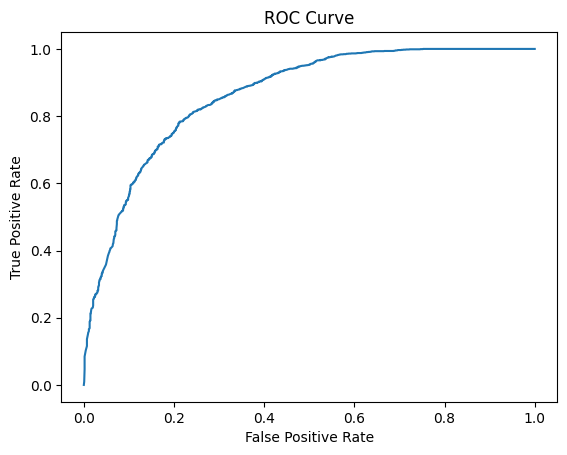

In [24]:
# ROC-AUC
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Target", metricName="areaUnderROC")
roc_auc = binary_evaluator.evaluate(rf_predictions)
print(f"ROC-AUC Curve: {roc_auc:.2f}")

# ROC Curve
rf_classifier_model = rf_model.stages[-1]
roc = rf_classifier_model.summary.roc.toPandas()
plt.plot(roc['FPR'], roc['TPR'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [25]:
# Evaluate the model
#RMSE
rmse_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Target", metricName="rmse")
rmse = rmse_evaluator.evaluate(rf_predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="accuracy")
rf_accuracy = evaluator_accuracy.evaluate(rf_predictions)
print(f"Accuracy: {rf_accuracy:.2f}")

# Precision
evaluator_precision = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="weightedPrecision")
rf_precision = evaluator_precision.evaluate(rf_predictions)
print(f"Precision: {rf_precision:.2f}")

# Recall
evaluator_recall = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="weightedRecall")
rf_recall = evaluator_recall.evaluate(rf_predictions)
print(f"Recall: {rf_recall:.2f}")

# F1-score
evaluator_f1 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Target", metricName="f1")
rf_f1_score = evaluator_f1.evaluate(rf_predictions)
print(f"F1-Score: {rf_f1_score:.2f}")

Root Mean Squared Error (RMSE): 0.46770717334674267
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-Score: 0.77


## K-means Clustering

In [32]:
clustering_feature_columns = [
    "Marital status",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Educational special needs",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "Age at enrollment",
    "Target"
]


# Format the data using Vector Assembler into vectors which will be used as “features”
vec_assembler = VectorAssembler(inputCols = feature_columns,outputCol='features')

data_df = vec_assembler.transform(student_df)
data_df.select('features').show(5)


+--------------------+
|            features|
+--------------------+
|[1.0,2.0,1.0,1.0,...|
|[1.0,11.0,1.0,1.0...|
|[1.0,5.0,1.0,1.0,...|
|[1.0,15.0,1.0,1.0...|
|[2.0,3.0,0.0,1.0,...|
+--------------------+
only showing top 5 rows



In [33]:
# Scaling the features
scaler = StandardScaler(inputCol="features",outputCol="scaled_features",withStd=True,withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(data_df)

# Normalize each feature to have unit standard deviation.
data_df = scalerModel.transform(data_df)

data_df.select('scaled_features').show(5)


+--------------------+
|     scaled_features|
+--------------------+
|[1.63129788929631...|
|[1.63129788929631...|
|[1.63129788929631...|
|[1.63129788929631...|
|[3.26259577859262...|
+--------------------+
only showing top 5 rows



In [34]:
# Computing WSSSE for K values from 2 to 8
silhouette_score=[]

evaluator = ClusteringEvaluator(predictionCol='prediction',featuresCol='scaled_features',
                                metricName='silhouette',distanceMeasure='squaredEuclidean')

for i in range(2,8):
    kmeans=KMeans(featuresCol='scaled_features', k=i)
    model=kmeans.fit(data_df)
    predictions=model.transform(data_df)
    score=evaluator.evaluate(predictions)
    silhouette_score.append(score)
    print('Silhouette Score for k =',i,'is',score)


Silhouette Score for k = 2 is 0.22173186057850489
Silhouette Score for k = 3 is 0.22023676080581647
Silhouette Score for k = 4 is 0.23687514404904286
Silhouette Score for k = 5 is 0.4040559975298846
Silhouette Score for k = 6 is 0.26216133559043886
Silhouette Score for k = 7 is 0.27573712023583585


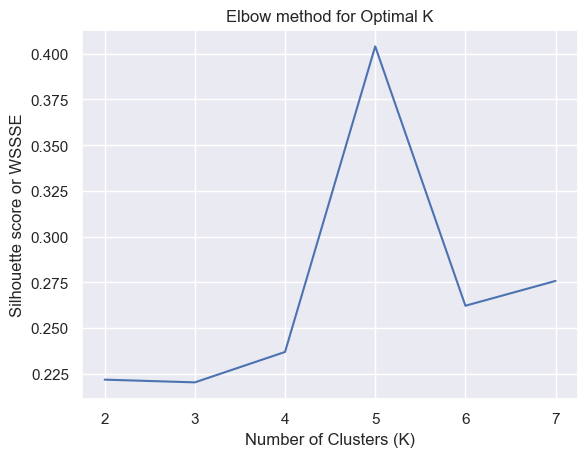

In [35]:
#Visualizing the silhouette scores in a plot
plt.plot(range(2,8),silhouette_score)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette score or WSSSE')
plt.title('Elbow method for Optimal K')
plt.show()


In [36]:
# Trains a k-means model.
# Define K-means clustering model
kmeans = KMeans(featuresCol='scaled_features',k=6,predictionCol='cluster')
kmeans_model = kmeans.fit(data_df)

#Assign datapoints to cluster 
clustered_data = kmeans_model.transform(data_df)

In [37]:
# Evaluating the model
output = kmeans_model.transform(data_df)
wssse_evaluator = ClusteringEvaluator(predictionCol="cluster", featuresCol="scaled_features", metricName="silhouette")
wssse = wssse_evaluator.evaluate(output)
print(f"Within Set Sum of Squared Errors (WSSSE) = {wssse}")

Within Set Sum of Squared Errors (WSSSE) = 0.26216133559043886


In [38]:
# Printing cluster centers
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Cluster Centers: 
[1.85684712 1.66078705 3.03326129 3.39649353 1.30849733 1.49437055
 1.90115456 1.77644014 0.12318822 2.36029895 1.13693274 0.42879933
 3.43847964]
[1.79247403 2.21547983 3.13715137 0.38557247 1.33042338 1.4693585
 1.93983058 1.66243649 0.0573526  0.         1.00822949 0.18948465
 3.17492486]
[7.03697129 2.2721476  2.04831955 1.23031468 1.96923545 1.89068194
 2.18696888 1.91300733 0.         2.18776572 0.53648682 0.53183087
 4.80678064]
[2.29573102 2.48949305 0.03556837 0.8883717  1.96151144 1.93611022
 2.03361988 1.74913119 0.02690417 2.42484915 0.86315489 0.20952045
 4.29888992]
[1.78748599 2.27098827 3.16558476 0.30549402 2.08972874 2.0968325
 2.55674323 2.25763531 0.07641929 2.92840282 0.66330976 0.0420797
 2.87735729]
[1.66235051 2.49116835 3.15755029 0.25910871 1.44387557 1.68392426
 2.08770764 1.857759   0.18232013 2.93248573 0.36057319 2.26028119
 2.50175918]
[1.66931192 2.29326444 3.15917021 0.28735791 0.61007285 0.77114386
 1.32571871 1.36603328 0.11644844 2.

## Model Selection

In [34]:
import pandas as pd

# Random Forest Classifier Evaluation
rf_metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "RMSE"],
    "Value": [rf_accuracy, rf_precision, rf_recall, rf_f1_score, rmse]
}

rf_metrics_df = pd.DataFrame(rf_metrics)

# Logistic Regression Evaluation
lr_metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Value": [lr_accuracy, lr_precision, lr_recall, lr_f1_score]
}

lr_metrics_df = pd.DataFrame(lr_metrics)

# Decision Tree Classifier Evaluation
dt_metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Value": [dt_accuracy, dt_precision, dt_recall, dt_f1_score]
}

dt_metrics_df = pd.DataFrame(dt_metrics)

# Combine metrics into a single table
combined_metrics = pd.concat([rf_metrics_df, lr_metrics_df,dt_metrics_df], keys=["Random Forest", "Logistic Regression","Decision Tree"])

# Display the combined metrics table
print(combined_metrics)


                          Metric     Value
Random Forest       0   Accuracy  0.781250
                    1  Precision  0.781026
                    2     Recall  0.781250
                    3   F1-Score  0.774935
                    4       RMSE  0.486423
Logistic Regression 0   Accuracy  0.752976
                    1  Precision  0.716895
                    2     Recall  0.601533
                    3   F1-Score  0.748173
Decision Tree       0   Accuracy  0.763393
                    1  Precision  0.761845
                    2     Recall  0.763393
                    3   F1-Score  0.762408


## Prediction System

In [ ]:
# print("Please provide input for each feature:")
user_input = []
for column in feature_columns:
    value = input(f"{column}: ")
    user_input.append(value)

# Create a DataFrame for the user input
user_df = spark.createDataFrame([user_input], feature_columns)

# Transform user input using the pipeline
user_input_assembled = rf_model.transform(user_df)

# Make prediction
prediction = user_input_assembled.select("prediction").first()[0]
print("Predicted value:", prediction)

if prediction == 0:
    status = "Dropped out"
else:
    status = "Graduate"

print(f"Based on the provided information, the student is predicted to be: {status}")

In [50]:
# stop spark session
spark.stop()